In [1]:
from CNNTrainer import GridSearcher, CNNTrainer
import torch
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")
if torch.cuda.is_available():
    torch.set_float32_matmul_precision('high')

In [2]:
from datasets.utils_datasets import get_mnist_binary_static_loaders
seed = 5
loaders = get_mnist_binary_static_loaders(seed=seed, batch_size_train=128)

# RENSET

In [3]:
gr_resnet = GridSearcher(loaders, resnet=True)

In [4]:
path = 'experiment_2/mnist'

In [5]:
gr_resnet.conduct_experiment(path=path, model='resnet')

Using device: cuda
Beta-VAE
conducting experiment 1 with beta: 1.0 and learning rate: 0.01
using seed: 1


  0%|          | 0/200 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [5]:
betas = np.linspace(np.log(0.01), np.log(10.), 10)

## Beta

beta=1.0, lr=0.0003
best learning rate for beta: 0.010000000000000004 is lr: 0.0003



  0%|          | 0/200 [00:00<?, ?it/s]

best learning rate for beta: 0.02154434690031885 is lr: 0.0003



  0%|          | 0/200 [00:00<?, ?it/s]

Early stopping at epoch: 170
best learning rate for beta: 0.046415888336127815 is lr: 0.0003



  0%|          | 0/200 [00:00<?, ?it/s]

Early stopping at epoch: 98
best learning rate for beta: 0.10000000000000002 is lr: 0.0003



  0%|          | 0/200 [00:00<?, ?it/s]

Early stopping at epoch: 182
best learning rate for beta: 0.21544346900318845 is lr: 0.0003



  0%|          | 0/200 [00:00<?, ?it/s]

Early stopping at epoch: 134
best learning rate for beta: 0.4641588833612781 is lr: 0.0003



  0%|          | 0/200 [00:00<?, ?it/s]

Early stopping at epoch: 184
best learning rate for beta: 1.0 is lr: 0.0003



  0%|          | 0/200 [00:00<?, ?it/s]

Early stopping at epoch: 185
best learning rate for beta: 2.154434690031884 is lr: 0.0003



  0%|          | 0/200 [00:00<?, ?it/s]

Early stopping at epoch: 197
best learning rate for beta: 4.641588833612779 is lr: 0.0003



  0%|          | 0/200 [00:00<?, ?it/s]

Early stopping at epoch: 193
best learning rate for beta: 10.000000000000002 is lr: 0.0003



  0%|          | 0/200 [00:00<?, ?it/s]

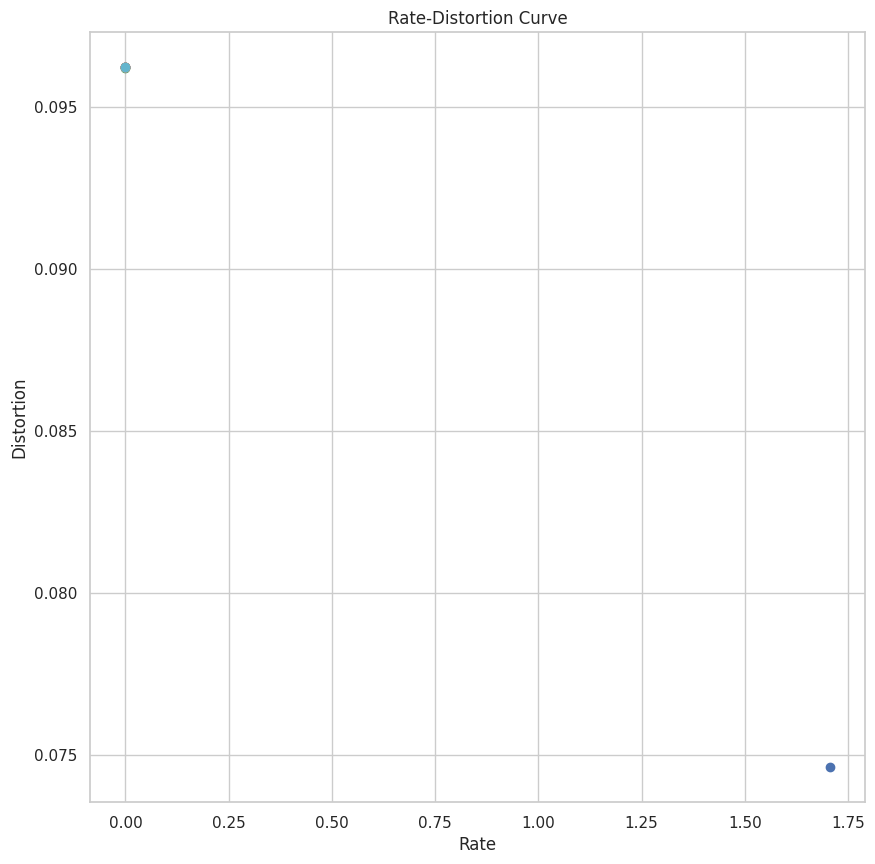

In [6]:
df_beta_vae: pd.DataFrame = pd.read_csv(f'{path}/resnet/beta_vae.csv', index_col=0)
df_beta_vae = df_beta_vae.reset_index(drop=True)
df_beta_vae.head()
# select the best for beta 
df_beta_vae_sorted = []
lr = 0
for name, group in df_beta_vae.groupby('beta'):
    lr = group.sort_values(by='mean_loss').reset_index().at[0, 'lr']
    df_beta_vae_sorted.append({'beta': name, 'lr': lr})
    print(f'beta={name}, lr={lr}')
df_beta_vae_sorted = pd.DataFrame(df_beta_vae_sorted)
torch.manual_seed(1)
np.random.seed(1)
rate_beta_vae = []
distortion_beta_vae = []
for i in range(0, len(betas)):
    beta = np.exp(betas[i])
    print(f'best learning rate for beta: {beta} is lr: {lr}\n')
    trainer = CNNTrainer(loaders, resnet=True, use_multi_rate=False, beta=beta, lr=lr)
    trainer.train()
    _, (rate_losses, dist_losses) = trainer.rate_distortion_curve_value(beta, beta)
    rate_beta_vae.append(rate_losses)
    distortion_beta_vae.append(dist_losses)

import matplotlib.pyplot as plt

# plot the rate distortion curve
fig = plt.figure(figsize=(10, 10))
for i in range(0, len(betas)):
    beta = np.exp(betas[i])
    plt.plot(rate_beta_vae[i], distortion_beta_vae[i], 'o', label=f'beta={beta}')
# plt.legend()
plt.xlabel('Rate')
plt.ylabel('Distortion')
plt.title('Rate-Distortion Curve')
try:
    plt.savefig(f'{path}/resnet/b_vae.pdf', bbox_inches="tight")
except:
    print('warning: unable to save at such location for beta resnet')
    pass
plt.show()

## Multi-rate

best lr for multi-rate vae  is 0.001


  0%|          | 0/200 [00:00<?, ?it/s]

Early stopping at epoch: 68


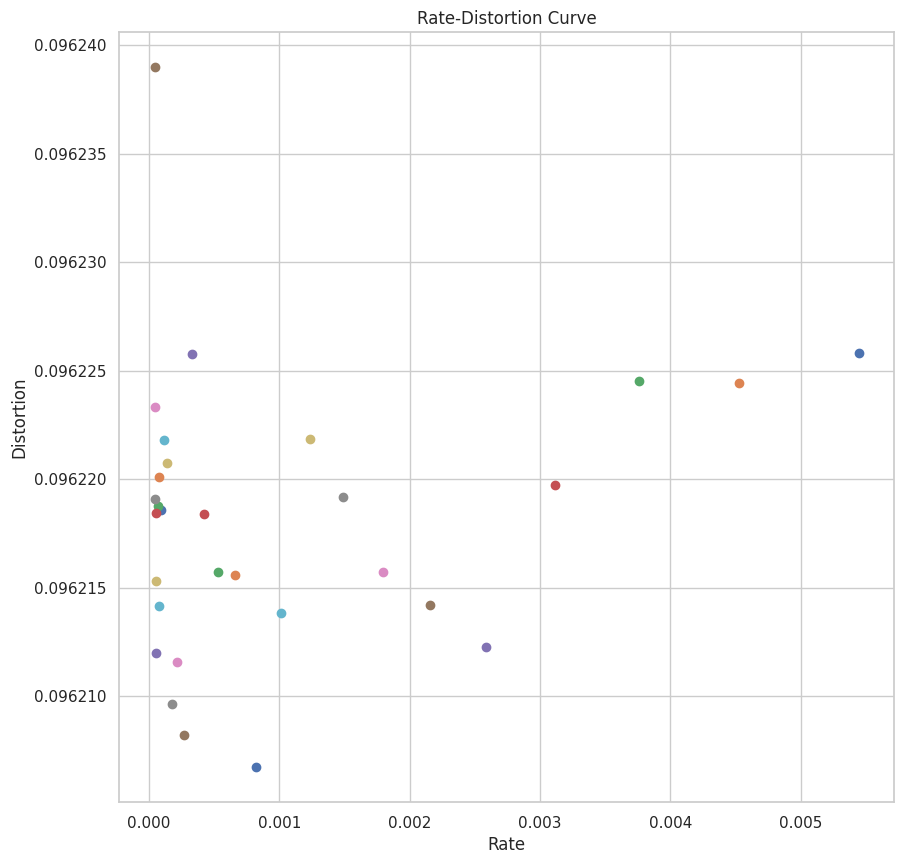

In [7]:
df_multi_rate: pd.DataFrame = pd.read_csv(f'{path}/resnet/mr_vae.csv', index_col=0)
df_multi_rate = df_multi_rate.reset_index(drop=True)
df_multi_rate.head()
best_lr = df_multi_rate.sort_values(by=['mean_loss']).reset_index().at[0, 'lr']
print(f'best lr for multi-rate vae  is {best_lr}')
torch.manual_seed(1)
np.random.seed(1)
trainer = CNNTrainer(loaders, resnet=True, use_multi_rate=True, lr=best_lr)
trainer.train()

rate_mr_vae = []
distortion_mr_vae = []
for b in np.linspace(start=np.log(0.01), stop=np.log(10.), num=30):
    _, (rate_losses, dist_losses) = trainer.rate_distortion_curve_value(beta_in=b, beta_loss=1.)
    rate_mr_vae.append(rate_losses)
    distortion_mr_vae.append(dist_losses)
import matplotlib.pyplot as plt

# plot the rate distortion curve
fig = plt.figure(figsize=(10, 10))
for i,beta in enumerate(np.linspace(start=np.log(0.01), stop=np.log(10.), num=30)):
    plt.plot(rate_mr_vae[i], distortion_mr_vae[i], 'o', label=f'beta={beta}')
# plt.legend()
plt.xlabel('Rate')
plt.ylabel('Distortion')
plt.title('Rate-Distortion Curve')
try:
    plt.savefig(f'{path}/resnet/mr_vae.pdf', bbox_inches="tight")
except:
    print('unable to save the image for multi rate resnet')
    pass
plt.show()

# ConvNet

In [ ]:
ga_cnn = GridSearcher(loaders, resnet=False)

In [ ]:
ga_cnn.conduct_experiment(path=path, model='convnet')

## Beta

In [ ]:
df_beta_vae: pd.DataFrame = pd.read_csv(f'{path}/convnet/beta_vae.csv', index_col=0)
df_beta_vae = df_beta_vae.reset_index(drop=True)
df_beta_vae.head()
# select the best for beta 
df_beta_vae_sorted = []
for name, group in df_beta_vae.groupby('beta'):
    lr = group.sort_values(by='mean_loss').reset_index().at[0, 'lr']
    df_beta_vae_sorted.append({'beta': name, 'lr': lr})
    print(f'beta={name}, lr={lr}')
df_beta_vae_sorted = pd.DataFrame(df_beta_vae_sorted)
torch.manual_seed(1)
np.random.seed(1)
rate_beta_vae = []
distortion_beta_vae = []
for i in range(0, len(betas)):
    beta = np.exp(betas[i])
    print(f'best learning rate for beta: {beta} is lr: {lr}\n')
    trainer = CNNTrainer(loaders, resnet=False, use_multi_rate=False, beta=beta, lr=lr)
    trainer.train()
    _, (rate_losses, dist_losses) = trainer.rate_distortion_curve_value(beta, beta)
    rate_beta_vae.append(rate_losses)
    distortion_beta_vae.append(dist_losses)

import matplotlib.pyplot as plt

# plot the rate distortion curve
fig = plt.figure(figsize=(10, 10))
for i in range(0, len(betas)):
    beta = np.exp(betas[i])
    plt.plot(rate_beta_vae[i], distortion_beta_vae[i], 'o', label=f'beta={beta}')
# plt.legend()
plt.xlabel('Rate')
plt.ylabel('Distortion')
plt.title('Rate-Distortion Curve')
try:
    plt.savefig(f'{path}/convnet/b_vae.pdf', bbox_inches="tight")
except:
    print('warning: unable to save at such location for beta convnet')
    pass
plt.show()

## Multi-rate

In [ ]:
df_multi_rate: pd.DataFrame = pd.read_csv(f'{path}/convnet/mr_vae.csv', index_col=0)
df_multi_rate = df_multi_rate.reset_index(drop=True)
df_multi_rate.head()
best_lr = df_multi_rate.sort_values(by=['mean_loss']).reset_index().at[0, 'lr']
print(f'best lr for multi-rate vae  is {best_lr}')
torch.manual_seed(1)
np.random.seed(1)
trainer = CNNTrainer(loaders, resnet=False, use_multi_rate=True, lr=best_lr)
trainer.train()

rate_mr_vae = []
distortion_mr_vae = []
for b in np.linspace(start=np.log(0.01), stop=np.log(10.), num=30):
    _, (rate_losses, dist_losses) = trainer.rate_distortion_curve_value(beta_in=b, beta_loss=1.)
    rate_mr_vae.append(rate_losses)
    distortion_mr_vae.append(dist_losses)
import matplotlib.pyplot as plt

# plot the rate distortion curve
fig = plt.figure(figsize=(10, 10))
for i,beta in enumerate(np.linspace(start=np.log(0.01), stop=np.log(10.), num=30)):
    plt.plot(rate_mr_vae[i], distortion_mr_vae[i], 'o', label=f'beta={beta}')
# plt.legend()
plt.xlabel('Rate')
plt.ylabel('Distortion')
plt.title('Rate-Distortion Curve')
try:
    plt.savefig(f'{path}/convnet/mr_vae.pdf', bbox_inches="tight")
except:
    print('unable to save the image for multi rate convnet')
    pass
plt.show()